# 傅利叶变换: 以$f(t) = sin(2\pi t)$为例

## 1. 画出$f(t)=sin(2 \pi t)$图像

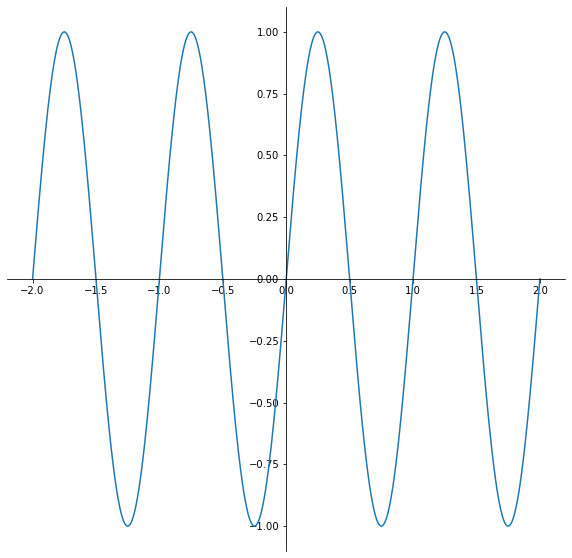

In [1]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
from matplotlib.widgets import TextBox
import numpy as np
plt.rcParams['figure.figsize'] = (10.0, 10.0)

def set_center_axis(ax):
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['left'].set_position(('data', 0))

t = np.linspace(-2, 2, num=1000)
f = np.sin(2*np.pi*t)
plt.plot(t,f)
set_center_axis(plt.gca())


## 2. $e^{-i\omega t}$长什么样子?

In [2]:
n = 0
def F(omega,t):
    z = np.exp(-1j*omega*t)
    print(z)
    plt.arrow(0,0,z.real,z.imag,head_width=0.05, head_length=0.1)
    plt.xlim(-1.1,1.1)
    plt.ylim(-1.1,1.1)
    ax1 = plt.gca()
    ax1.set_xlabel('real',position=(1,0),fontsize = 14)
    ax1.set_ylabel('imag',position=(0,1),fontsize = 14)
    set_center_axis(plt.gca())
    textstr = '\n'.join((r'$e^{-i%.2f t}$' % (omega, ),))
    ax1.text(0.5,0.5,textstr,fontsize = 30)
    
interactive_plot = interactive(F,omega=(0, 2*np.pi, 0.1),t=(0, 2*np.pi, 0.1))
output = interactive_plot.children[-1]
output.layout.height = '600px'

interactive_plot

interactive(children=(FloatSlider(value=3.1, description='omega', max=6.283185307179586), FloatSlider(value=3.…

## 3. $sin(2\pi t)e^{-2\pi i \omega t}$ 和 $\left| \mathscr{F}[sin(2\pi t)] \right|$

In [3]:


ft_line = np.empty(shape =(1,2))
def F(freq):
    global ft_line
    fig, (ax1, ax2) = plt.subplots(2, 1)
    t = np.linspace(0, np.pi, num=1000)
    ft = np.exp(2*np.pi*freq*1j*t) * np.sin(2*np.pi*t)
    Amp = abs(ft.sum())
    if ft_line.shape ==(1,2):
        ft_line = np.array([[freq,Amp]])
    ft_line = np.append(ft_line,np.array([[freq,Amp]]),axis=0)
    ax1.plot(ft.real,ft.imag)
    set_center_axis(ax1)
    ax1.set_xlabel('real',position=(1,0),fontsize = 14)
    ax1.set_ylabel('imag',position=(0,1),fontsize = 14)
    ax1.set_aspect(1)
    textstr = '\n'.join((r'$sin(2\pi t)e^{-2\pi it}\cdot e^{%.2f}$' % (freq, ),))
    ax1.text(0.05,1.1,textstr,fontsize = 30)
    ax2.scatter(ft_line[:,0],ft_line[:,1])
    ax2.set_xlabel('$freq$',fontsize=14)
    textstr2 = '\n'.join((r'$ A = \left|\int^{+\infty}_{-\infty}sin(2\pi t)e^{-2\pi it}\cdot e^{%.2f} dt\right|$' % (freq, ),))
    ax2.set_ylabel(textstr2,fontsize = 14)
    
interactive_plot = interactive(F,freq=(-2, 2, 0.01))
output = interactive_plot.children[-1]
output.layout.height = '1000px'

interactive_plot

interactive(children=(FloatSlider(value=0.0, description='freq', max=2.0, min=-2.0, step=0.01), Output(layout=…